In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df = pd.read_csv('/content/Bengaluru_House_Data.csv')

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an essential initial step in understanding the dataset and gaining insights into the Bengaluru housing market. This section focuses on exploring, visualizing, and summarizing key aspects of the dataset.

## Data Overview

The dataset used for the Bengaluru house price prediction project contains information about various factors influencing house prices, such as location, square footage, number of bedrooms and bathrooms, amenities, and more.

### Summary Statistics

The summary statistics provide an overview of the dataset's numerical features, giving insight into central tendencies, spread, and potential outliers:

```python



In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.shape

(13320, 9)

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [10]:
df.drop(['availability','society','balcony'],axis=1,inplace=True)

In [11]:
droping = df.dropna(subset=['location'], inplace=True)

In [12]:
df.isnull().sum()

area_type      0
location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df.isnull().sum()

area_type      0
location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
mean = df['bath'].mean()
df['bath'].fillna(mean,inplace=True)

In [15]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df.dropna()
df.isnull()

,area_type,location,size,total_sqft,bath,price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
13315,False,False,False,False,False,False
13316,False,False,False,False,False,False
13317,False,False,False,False,False,False
13318,False,False,False,False,False,False


In [17]:
non_string_values = df[df['size'].apply(lambda x: not isinstance(x, str))]['size']
print(non_string_values)


579      NaN
1775     NaN
2264     NaN
2809     NaN
2862     NaN
5333     NaN
6423     NaN
6636     NaN
6719     NaN
7680     NaN
8306     NaN
8565     NaN
8703     NaN
10634    NaN
11019    NaN
11569    NaN
Name: size, dtype: object


### Code: Extracting Bedroom Information

This code snippet creates a new column 'bhk' in the DataFrame:

- It extracts the number of bedrooms from the 'size' column.
- Utilizes the `apply` function with a lambda to process each value.
- Splits the string by space, extracts the first part (representing the number of bedrooms), and converts it to an integer.
- If the value is not a string, it assigns `None` to the 'bhk' column.


In [18]:
df['bhk'] = df['size'].apply(lambda x: int(str(x).split(' ')[0]) if isinstance(x, str) else None)

In [19]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True


In [21]:
df[~df['total_sqft'].apply(is_float)].head()

,area_type,location,size,total_sqft,bath,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.000000,186.000,4.0
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,2.692586,192.000,4.0
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,2.692586,224.500,4.0
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.000000,477.000,4.0
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.000000,54.005,2.0


### Function: `to_convert_sqft_to_num`

This function converts square footage values into numerical format, handling various formats:

- For range values (e.g., "1000-1500"), it calculates the average.
- For single values, it converts the value to a float.
- If unable to convert, it returns `None`.


In [22]:
def to_convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None


In [23]:
df1=df.copy()

In [24]:

# Drop rows with any missing values
df1.dropna(inplace=True)


In [25]:
df1['total_sqft'] = df1['total_sqft'].apply(to_convert_sqft_to_num)

In [26]:
df1.shape

(13303, 7)

In [27]:
df1.head()

,area_type,location,size,total_sqft,bath,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2.0


# **Feature Engineering**

### Feature Engineering: 'price_per_sqft' and 'location' Transformation

- **'price_per_sqft':**
  - Calculates the price per square foot by dividing 'price' by 'total_sqft' and scaling it by 100,000.
  
- **'location' Transformation:**
  - Removes trailing spaces from the 'location' column values.
  - Groups locations by count and identifies those with 10 or fewer occurrences ('location_stats_less_10').
  - Replaces locations with 10 or fewer occurrences with 'other' to reduce location granularity.


In [28]:
df1['price_per_sqft'] = df1['price']*100000/df1['total_sqft']

In [29]:
len(df1.location.unique())

1304

In [30]:
df1['location'] = df1['location'].apply(lambda x: x.strip())
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.unique()

array([540, 397, 304, 273, 237, 212, 186, 177, 175, 171, 152, 149, 142,
       132, 107, 100,  96,  91,  88,  85,  84,  82,  79,  74,  73,  72,
        71,  70,  66,  64,  63,  62,  60,  58,  57,  55,  54,  53,  52,
        51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,
        38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1])

In [31]:
location_stats_less_10 = location_stats[location_stats<=10]
location_stats_less_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [32]:
df1.location= df1.location.apply(lambda x: 'other' if x in location_stats_less_10 else x)
len(df1.location.unique())

242

### Outlier Handling:

#### Identifying Outliers:
- Examined properties where the square footage per bedroom was less than 300 sqft, possibly indicating outliers.

#### Removing Outliers:
- Created a new DataFrame 'df2' excluding properties with square footage per bedroom < 300.
- Defined a function 'remove_pps_outliers' to remove outliers based on 'price_per_sqft' for each location:
  - Iterated through locations and calculated mean and standard deviation of 'price_per_sqft'.
  - Filtered properties within 1 standard deviation from the mean 'price_per_sqft' for each location.
  - Concatenated filtered dataframes into 'df_out'.
- Processed 'df2' with 'remove_pps_outliers' function to create 'df3' with outliers removed.

The process focuses on removing


In [33]:
df1[df1.total_sqft/df1.bhk<300].head()

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [34]:
df2=df1[~(df1.total_sqft/df1.bhk<300)]
df1

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,Super built-up Area,other,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


In [35]:
df2.shape

(12559, 8)

In [36]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df3 = remove_pps_outliers(df2)
df3.shape


(10286, 8)

### Function: `plot_scatter_chart`

Creates a scatter plot to compare property prices based on total square footage area for 2 BHK and 3 BHK properties in a specified location.


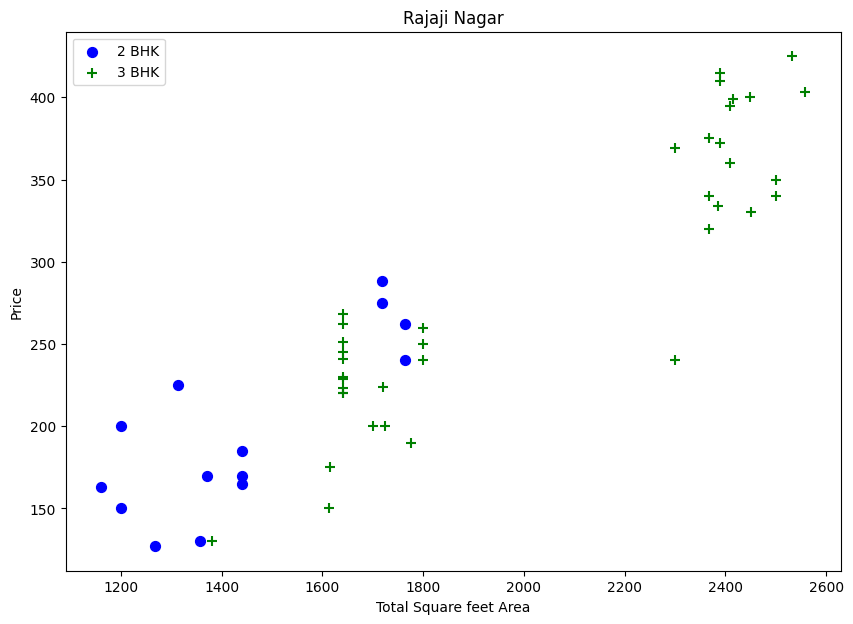

In [37]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (10,7)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
  plt.xlabel('Total Square feet Area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()

plot_scatter_chart(df3,'Rajaji Nagar')

### Function: `plot_scatter_chart`

Creates a scatter plot comparing property prices by total square footage for 2 BHK and 3 BHK properties in the 'Hebbal' location.


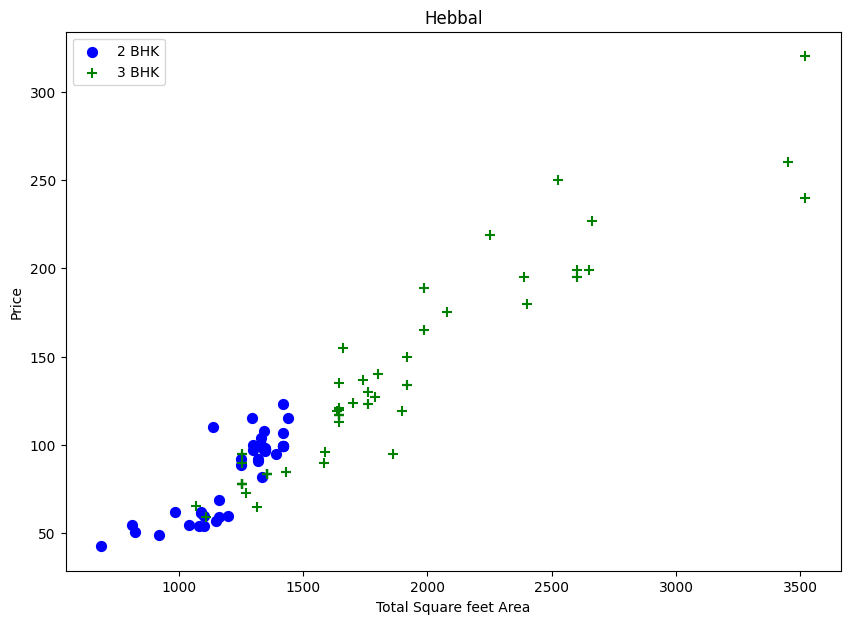

In [38]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (10,7)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
  plt.xlabel('Total Square feet Area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()

plot_scatter_chart(df3,'Hebbal')

we should also remove properties for some location, the price of (for example) 3 edroom appartment is less than 2 bedroom appartment (with same square ft areas). what will do is for a given location, we build a dictionary of stats per bhk, ie

    {
      '1' : {
          'mean': 4000,
          'std': 2000,
          'count': 34
      },
      '2' : {
          'mean': 4300
          'std': 2300
          'count':22
      },
    }

Now we can remove those 2BHK appartments whose price_sqft is less than mean_per_sqft of 1 BHK appartment      

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices, axis='index')


In [40]:
df4 = remove_bhk_outliers(df3)
df4.shape

(7353, 8)

In [41]:
df3.shape

(10286, 8)

removing outliers from a DataFrame based on the price per square foot (price_per_sqft) grouped by location and BHK (bedrooms, hall, kitchen) categories.

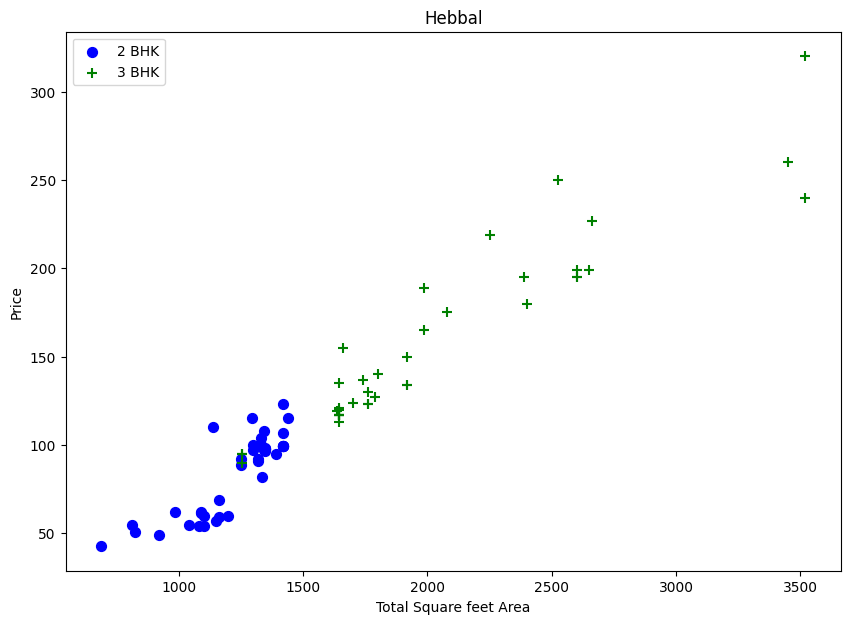

In [42]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (10,7)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
  plt.xlabel('Total Square feet Area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()

plot_scatter_chart(df4,'Hebbal')

Text(0, 0.5, 'count')

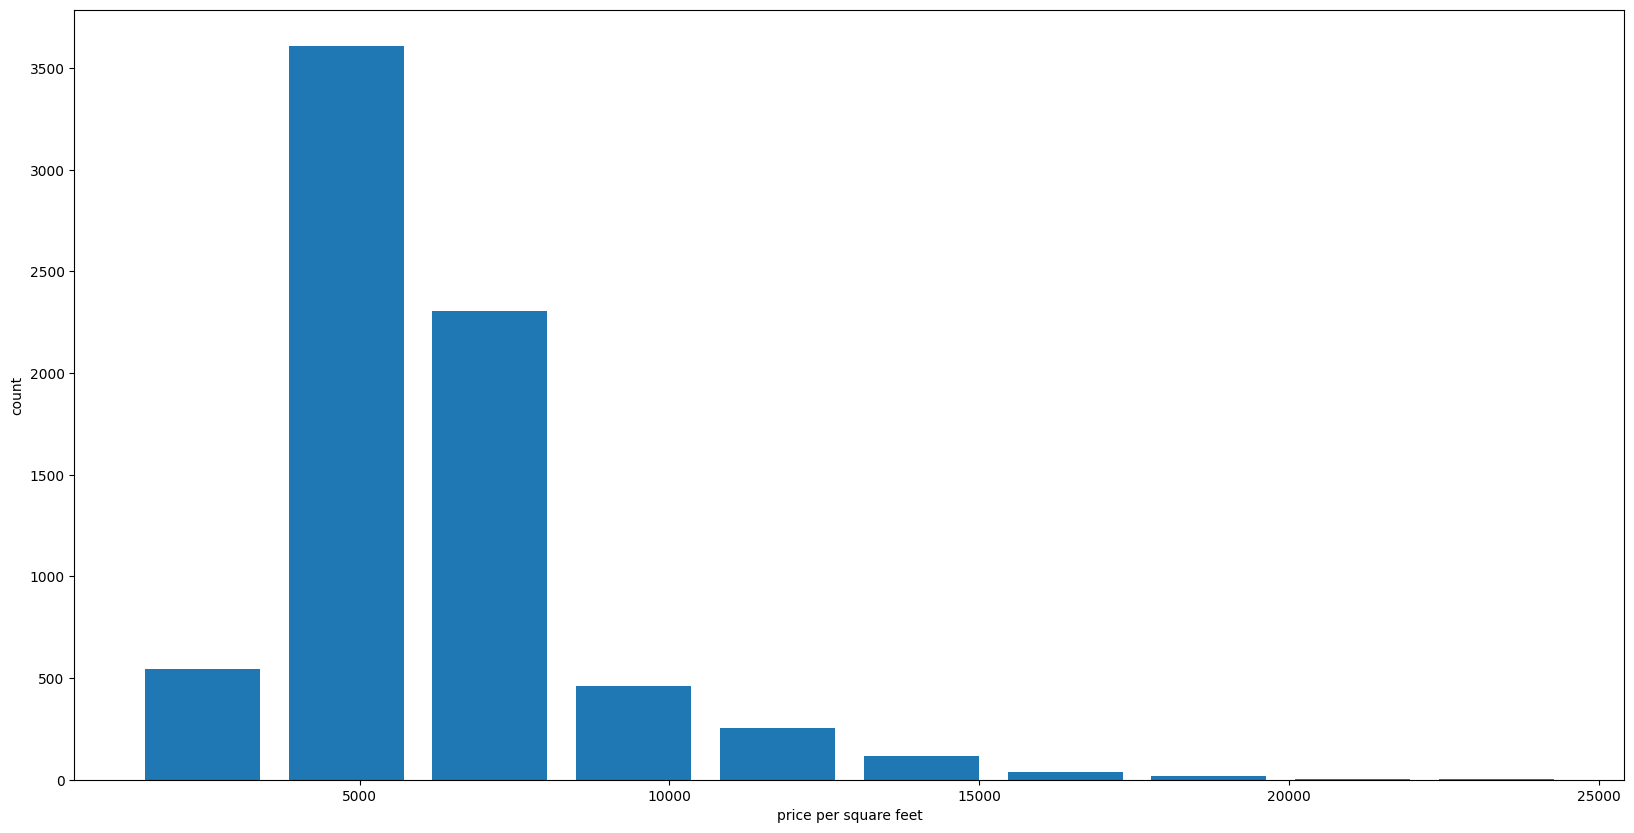

In [43]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df4.price_per_sqft,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

In [44]:
df4.bath.unique()

array([ 4.        ,  3.        ,  2.        ,  5.        ,  8.        ,
        1.        ,  6.        ,  2.69258644,  7.        ,  9.        ,
       12.        , 16.        , 13.        ])

In [45]:
df4[df4.bath>10]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
5306,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8530,Super built-up Area,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8619,Super built-up Area,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9352,Super built-up Area,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9683,Super built-up Area,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


Text(0, 0.5, 'count')

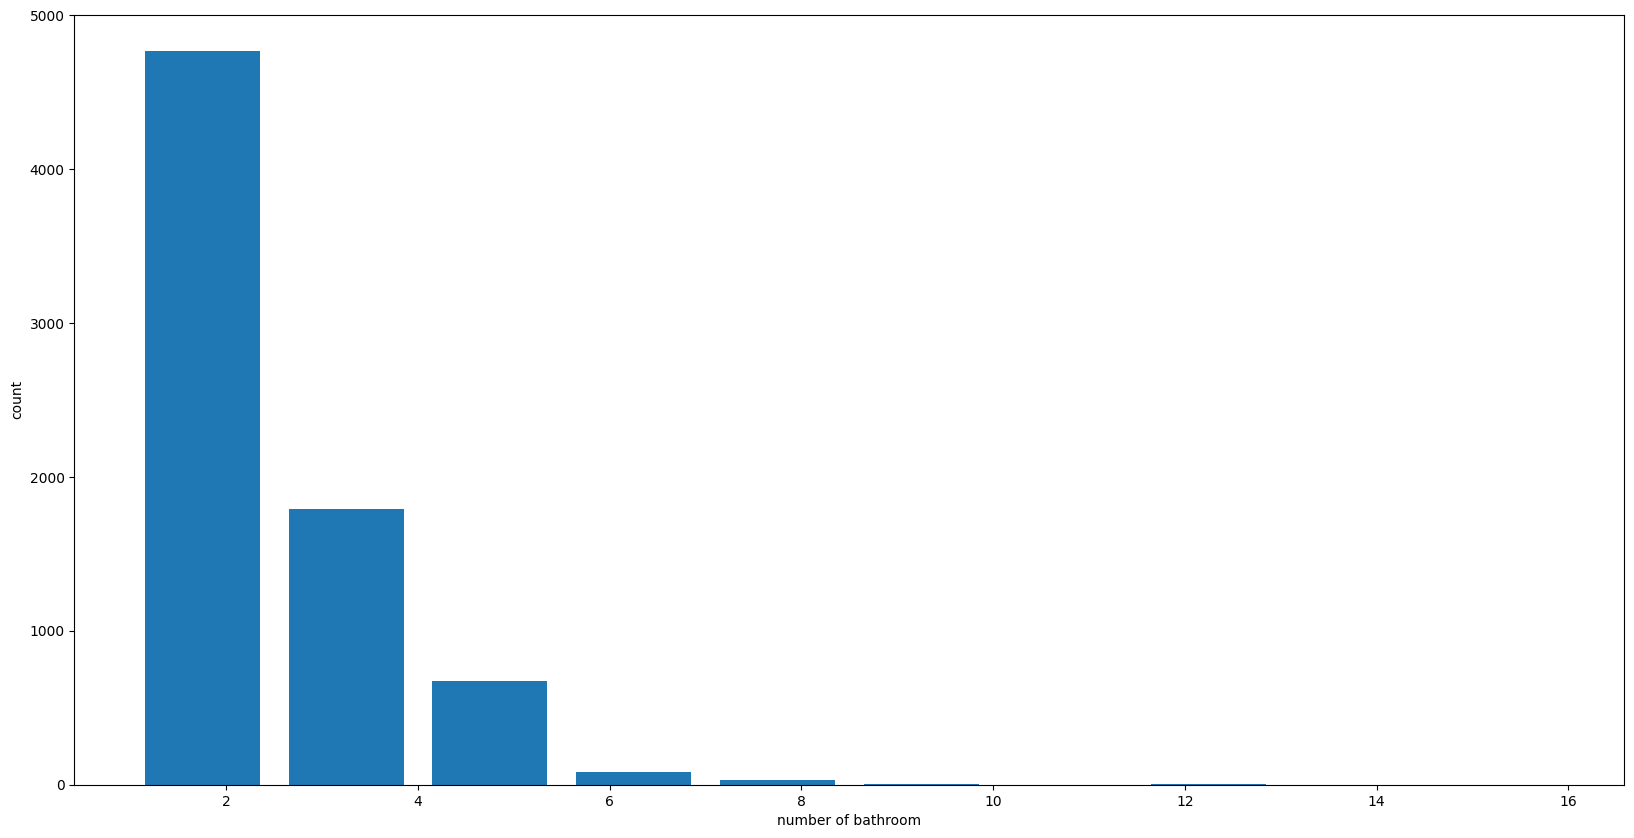

In [46]:
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel('number of bathroom')
plt.ylabel('count')

In [47]:
df4[df4.bath>=8]

,area_type,location,size,total_sqft,bath,price,bhk,price_per_sqft
36,Plot Area,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6.0,15033.333333
37,Plot Area,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6.0,18750.000000
293,Built-up Area,Abbigere,8 Bedroom,3000.0,8.0,150.0,8.0,5000.000000
1301,Built-up Area,Bommanahalli,8 Bedroom,3000.0,8.0,140.0,8.0,4666.666667
3041,Built-up Area,Hennur Road,8 Bedroom,5000.0,8.0,250.0,8.0,5000.000000
3259,Built-up Area,Horamavu Banaswadi,6 Bedroom,3800.0,8.0,200.0,6.0,5263.157895
3531,Plot Area,Indira Nagar,8 Bedroom,3250.0,8.0,600.0,8.0,18461.538462
3794,Built-up Area,KR Puram,9 BHK,4600.0,9.0,200.0,9.0,4347.826087
5141,Super built-up Area,Mico Layout,9 BHK,5000.0,9.0,210.0,9.0,4200.000000
5267,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429


In [130]:
df4.location.head()

0    1st Block Jayanagar
1    1st Block Jayanagar
2    1st Block Jayanagar
3    1st Block Jayanagar
4    1st Block Jayanagar
Name: location, dtype: object

In [48]:
df5 = df4[df4.bath<df4.bhk+2]
df5.shape

(7275, 8)

In [49]:
df6 = df5.drop(['price_per_sqft','size'],axis=1)

In [50]:
df6

,area_type,location,total_sqft,bath,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2.0
...,...,...,...,...,...,...
10277,Carpet Area,other,1200.0,2.0,70.0,2.0
10278,Super built-up Area,other,1800.0,1.0,200.0,1.0
10281,Super built-up Area,other,1353.0,2.0,110.0,2.0
10282,Plot Area,other,812.0,1.0,26.0,1.0


### Creating Dummy Variables

The code snippet creates dummy variables using one-hot encoding for categorical columns 'area_type' and 'location' from DataFrame 'df6'.


In [51]:
dummies = pd.get_dummies(df6[['area_type','location']])
dummies

,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10278,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10282,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
df7= pd.concat([df6,dummies],axis=1)
df7.head(3)

,area_type,location,total_sqft,bath,price,bhk,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df7=df7.drop(['location','area_type'],axis=1)

In [54]:
df7.head(3)

,total_sqft,bath,price,bhk,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building: Linear Regression

- **Data Splitting:**
  - Features (X) are derived from DataFrame 'df7' excluding the 'price' column.
  - Target variable (y) is set as 'price' from DataFrame 'df7'.

- **Train-Test Split:**
  - Utilizes `train_test_split` to split the data into training and testing sets (80:20 ratio) for X and y.
  
- **Model Training:**
  - Utilizes `LinearRegression` from scikit-learn for modeling.
  - Fits the model on the training data (`X_train`, `y_train`).

- **Model Evaluation:**
  - Computes the model's performance using `score` on the test data (`X_test`, `y_test`).
  - Further evaluation includes calculating Mean Squared Error (MSE) and R-squared using `mean_squared_error` and `r2_score` functions, respectively.


In [55]:
x = df7.drop('price', axis=1)
x.head(3)

,total_sqft,bath,bhk,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,4.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y=df7['price']
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [58]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()


In [60]:
ln.fit(X_train,y_train)


LinearRegression()

In [61]:
ln.score(X_test,y_test)

0.8323946188432136

### Visualization and Metrics Display

- **Scatter Plot:**
  - Creates a scatter plot visualizing actual prices against predicted prices.
  - X-axis represents actual prices (`y_test`), while the Y-axis shows predicted prices.
  - The title of the plot is 'Actual vs. Predicted Prices'.

- **Evaluation Metrics:**
  - Displays the Mean Squared Error (MSE) and R-squared values calculated previously.
  - Prints the MSE and R-squared values to assess model performance.


In [125]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [120]:
prediction = ln.predict(X_test)

In [124]:
mse = mean_squared_error(y_test, prediction)
r_squared = r2_score(y_test, prediction)

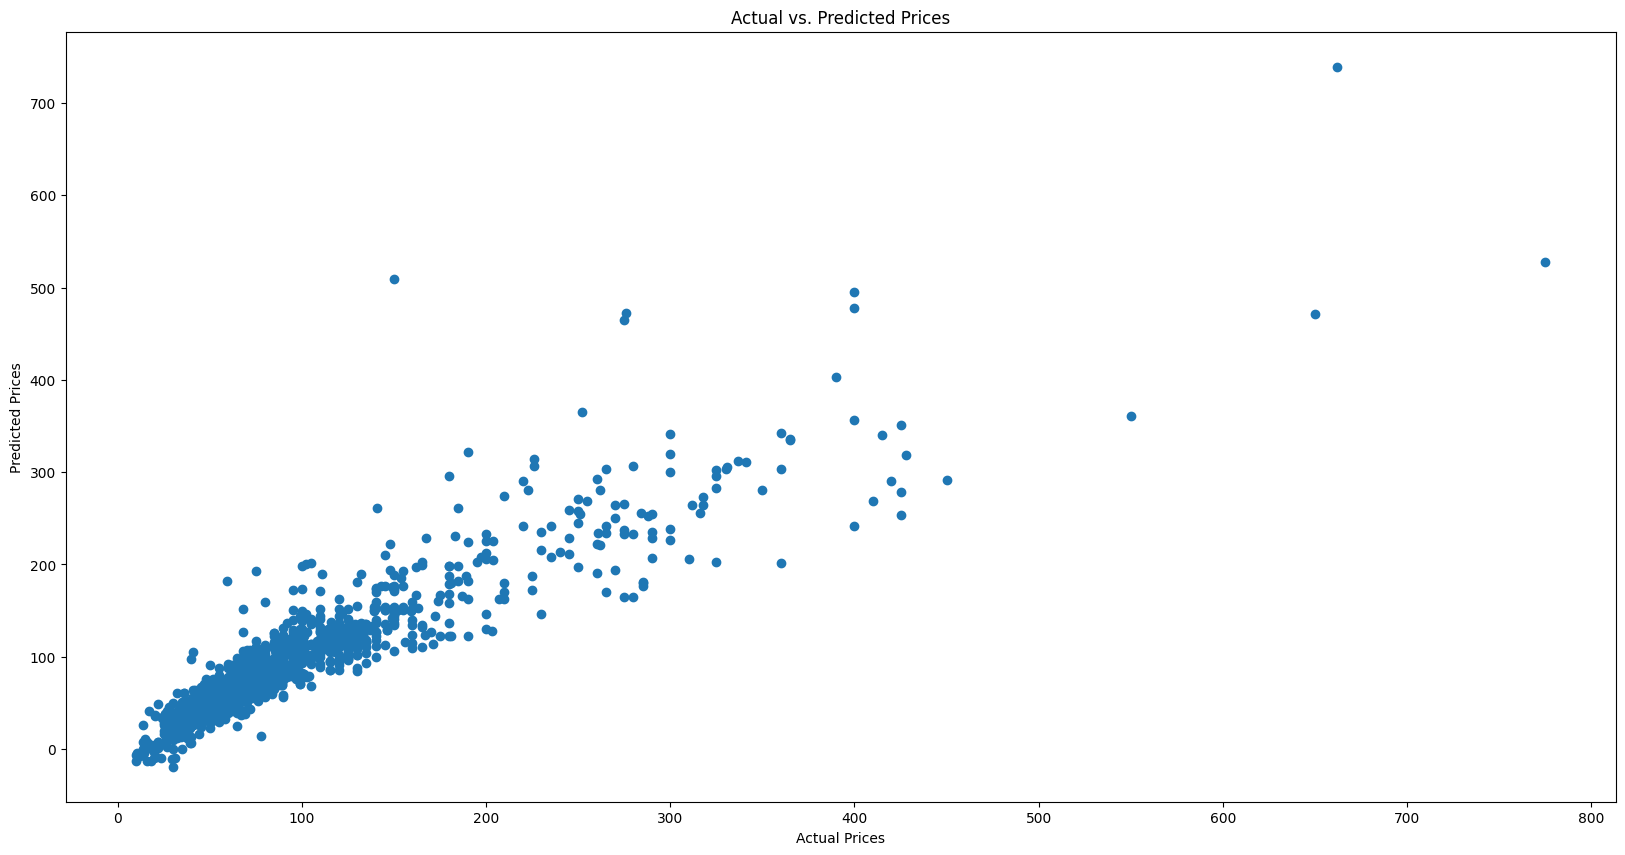

Mean Squared Error: 901.0628062365381
R-squared: 0.8323946188432136


In [127]:
# Visualization
plt.scatter(y_test, prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

### Model Selection and Hyperparameter Tuning

- **Cross-Validation and Model Comparison:**
  - Utilizes `ShuffleSplit` and `cross_val_score` to evaluate multiple algorithms' performance (e.g., Linear Regression, Lasso, Decision Tree) using cross-validation.
  - Generates cross-validated scores for different models to assess their generalization performance.

- **Hyperparameter Optimization:**
  - Employs `GridSearchCV` to systematically search for the best combination of hyperparameters for each algorithm.
  - Fine-tunes hyperparameters for models (e.g., 'alpha', 'selection', 'criterion', 'splitter') to improve their performance.

- **Model Evaluation and Comparison Results:**
  - Creates a DataFrame displaying the best scores and corresponding optimized hyperparameters for each algorithm.
  - Assists in selecting the most suitable model for the dataset based on performance metrics.


In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [63]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x,y ,cv=cv)

array([0.80285271, 0.77384243, 0.86589976, 0.83930301, 0.81793096])

In [64]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

### Automated Model Selection and Tuning

Finds the best regression model and optimal hyperparameters among defined algorithms using automated search techniques.


In [65]:
def find_best_model(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [66]:
find_best_model(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.820566,{'fit_intercept': False}
1,lasso,0.690439,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.755609,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


### House Price Prediction Function

- **Inputs:**
  - 'location_stat': Encoded location information.
  - 'sqft': Square footage of the house.
  - 'bath': Number of bathrooms.
  - 'bhk': Number of bedrooms.

- **Functionality:**
  - Encodes the location information and prepares input features.
  - Utilizes a trained linear regression model (`ln`) to predict house prices based on the provided features.

- **Example Predictions:**
  - Calls the function with specific inputs for 'location_1st Phase JP Nagar', square footage, bathrooms, and bedrooms to predict house prices.


In [115]:

def predict_price(location_stat,sqft,bath,bhk):
  loc_index = np.where(x.columns==location_stat)[0][0]

  X=np.zeros(len(x.columns))
  X[0] = sqft
  X[1] = bath
  X[2] = bhk
  if loc_index >= 0:
    X[loc_index] = 1

  return ln.predict([X])[0]

In [116]:
predict_price('location_1st Phase JP Nagar',1000,2,2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61094241223.521416

In [117]:
predict_price('location_1st Phase JP Nagar',1000,3,3)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61094241226.70119

In [119]:
predict_price('location_Whitefield',1000,2,2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61094241191.278015

## Conclusion

In this notebook, we embarked on a comprehensive journey to predict house prices in Bengaluru using machine learning techniques. The key stages of our analysis included:

- **Exploratory Data Analysis (EDA):** Understanding the dataset's characteristics, visualizing distributions, and handling missing values.
- **Feature Engineering:** Creating new features like 'price_per_sqft' and transforming categorical variables using one-hot encoding.
- **Outlier Handling:** Identifying and removing outliers from the dataset to improve model performance.
- **Model Building:** Utilizing Linear Regression and further model evaluation using MSE, R-squared, and visualization techniques.
- **Model Selection and Hyperparameter Tuning:** Employing multiple algorithms and hyperparameter optimization using GridSearchCV for the best model selection.
- **Prediction Function:** Developing a function to predict house prices based on location, square footage, bathrooms, and bedrooms.

Our analysis demonstrates the significance of various factors influencing house prices. While Linear Regression served as a baseline model, further exploration involving Lasso and Decision Trees aided in selecting the most suitable model.

As we conclude, this analysis provides a foundation for predicting house prices in Bengaluru. Further enhancements and data refinements could potentially improve model accuracy, providing valuable insights for stakeholders in the real estate domain.
